# XFOIL

## Overview

XFOIL is a design and analysis tool for subsonic airfoils developed by Mark Drela at MIT.

The [XFOIL website](https://web.mit.edu/drela/Public/web/xfoil/) contains more info.

## Setup

As with the previous AVL tutorial, a copy of the XFOIL executable must be somewhere on your computer in order to use it with AeroSandbox.

Download a copy of the executable from the [XFOIL website](https://web.mit.edu/drela/Public/web/xfoil/) for your operating system. Place it anywhere on your computer, and remember the filepath to the executable.

## Running XFOIL from AeroSandbox

First, we'll do some imports. We'll also do some stuff that is only necessary for this tutorial to run correctly in a browser - ignore this following code block. (Basically, it's to make unit testing of tutorials happy.)

In [34]:
import aerosandbox as asb
import aerosandbox.numpy as np
from shutil import which

xfoil_is_present = which('xfoil') is not None

Next, we'll define an airfoil to analyze:

In [35]:
airfoil = asb.Airfoil("dae51")


And draw it:

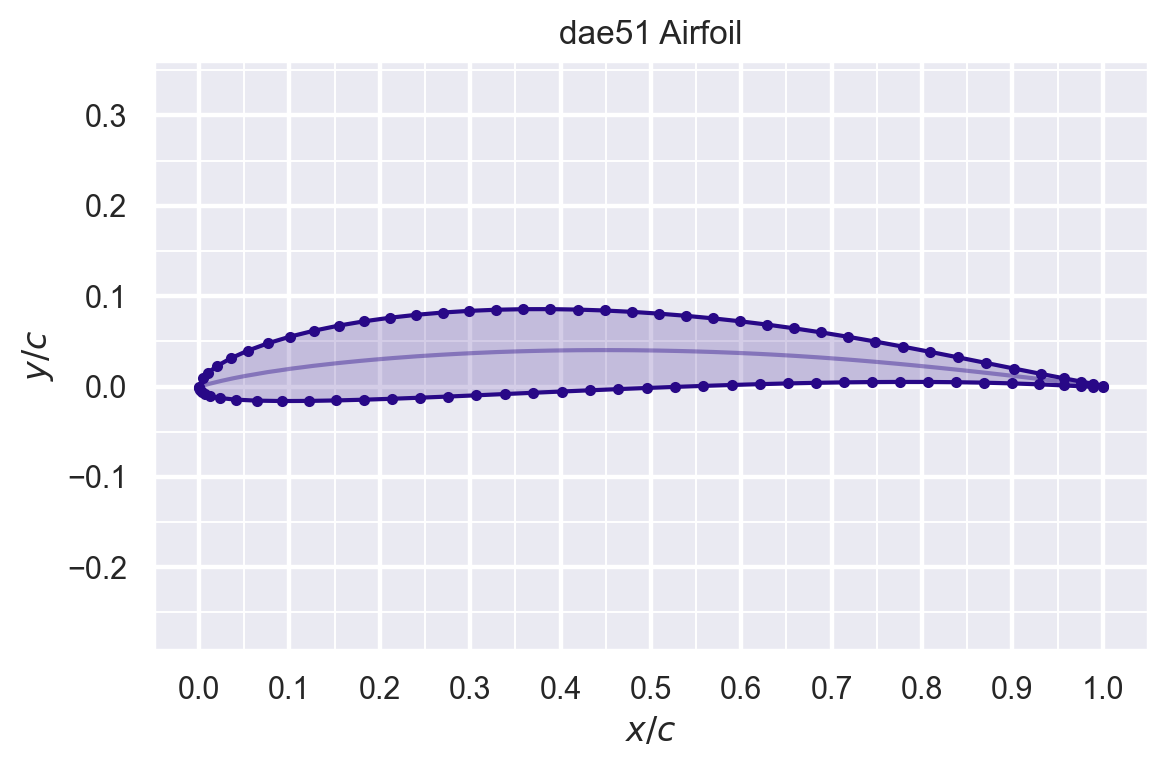

In [36]:
from aerosandbox.tools.pretty_plots import plt, show_plot, set_ticks  # sets some nice defaults

airfoil.draw(show=False)
set_ticks(0.1, 0.05, 0.1, 0.05)
show_plot()

Now, let's analyze it:

In [37]:
if xfoil_is_present: # Ignore this; just for tutorial purposes.

    analysis = asb.XFoil(
        airfoil=airfoil,
        Re=3e5,
        xfoil_command="xfoil", # If XFOIL is not on your PATH, the nset xfoil_command to the filepath to your XFOIL executable.
    )

    point_analysis = analysis.alpha(
        alpha=3
    )

    from pprint import pprint
    print("\nPoint analysis:")
    pprint(point_analysis)

    sweep_analysis = analysis.alpha(
        alpha=np.linspace(0, 15, 6)
    )
    print("\nSweep analysis:")
    pprint(sweep_analysis)

    cl_analysis = analysis.cl(
        cl=1.2
    )
    print("\nFixed-CL analysis:")
    pprint(cl_analysis)


Point analysis:
{'CD': array([0.00873]),
 'CDp': array([0.00331]),
 'CL': array([0.8061]),
 'CM': array([-0.1027]),
 'alpha': array([3.]),
 'xtr_lower': array([1.]),
 'xtr_upper': array([0.6723])}

Sweep analysis:
{'CD': array([0.00803, 0.00873, 0.0112 , 0.02424, 0.0476 , 0.10259]),
 'CDp': array([0.00333, 0.00331, 0.00528, 0.01627, 0.04116, 0.09863]),
 'CL': array([0.4719, 0.8061, 1.1197, 1.3017, 1.3653, 1.2536]),
 'CM': array([-0.1039, -0.1027, -0.0984, -0.0776, -0.0525, -0.0556]),
 'alpha': array([ 0.,  3.,  6.,  9., 12., 15.]),
 'xtr_lower': array([1., 1., 1., 1., 1., 1.]),
 'xtr_upper': array([0.7857, 0.6723, 0.4502, 0.0199, 0.0102, 0.0105])}

Fixed-CL analysis:
{'CD': array([0.01432]),
 'CDp': array([0.00728]),
 'CL': array([1.2]),
 'CM': array([-0.0938]),
 'alpha': array([7.021]),
 'xtr_lower': array([1.]),
 'xtr_upper': array([0.2325])}
